# Importing necessary libraries 

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reading and Cleaning the dataset

In [115]:
df=pd.read_csv("country_timeseries.csv")

In [116]:
df.head(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [117]:
df.tail(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

### Each country has two columns, one for cases and another for deaths. For simplicity of our analysis we will reduce the dataframe to one column representing deaths, one case and one for country.


We will convert the data in two steps, in step one we will count the total number of cases by country and in step two, we will count the total number of deaths by country.

In [119]:
df1=df.melt(id_vars=['Date','Day','Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali'],
                     var_name='Country',
                     value_name='Deaths')

In [120]:
df2=df.melt(id_vars=['Date','Day','Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
                     var_name='Country',
                     value_name='Cases')

In [121]:
df1=df1[["Date","Day","Country","Deaths"]]

In [122]:
df1.head()

,Date,Day,Country,Deaths
0,1/5/2015,289,Deaths_Guinea,1786.0
1,1/4/2015,288,Deaths_Guinea,1781.0
2,1/3/2015,287,Deaths_Guinea,1767.0
3,1/2/2015,286,Deaths_Guinea,NaN
4,12/31/2014,284,Deaths_Guinea,1739.0


In [123]:
split=df1["Country"].str.split('_')

In [124]:
df1['Country']=split.str.get(1)

In [125]:
df1.head(5)

,Date,Day,Country,Deaths
0,1/5/2015,289,Guinea,1786.0
1,1/4/2015,288,Guinea,1781.0
2,1/3/2015,287,Guinea,1767.0
3,1/2/2015,286,Guinea,NaN
4,12/31/2014,284,Guinea,1739.0


In [126]:
split2=df2["Country"].str.split('_')

In [127]:
df2['Country']=split2.str.get(1)

In [128]:
df2.head(5)

,Date,Day,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,Country,Cases
0,1/5/2015,289,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,Guinea,2776.0
1,1/4/2015,288,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,Guinea,2775.0
2,1/3/2015,287,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,Guinea,2769.0
3,1/2/2015,286,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,Guinea,NaN
4,12/31/2014,284,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,Guinea,2730.0


In [129]:
df2=df2[["Date","Day","Cases","Country"]]

In [130]:
df2.head(5)

,Date,Day,Cases,Country
0,1/5/2015,289,2776.0,Guinea
1,1/4/2015,288,2775.0,Guinea
2,1/3/2015,287,2769.0,Guinea
3,1/2/2015,286,NaN,Guinea
4,12/31/2014,284,2730.0,Guinea


In [131]:
df=pd.merge(df1,df2,on=["Date","Day","Country"],how="inner")

In [132]:
df.head(20)

,Date,Day,Country,Deaths,Cases
0,1/5/2015,289,Guinea,1786.0,2776.0
1,1/4/2015,288,Guinea,1781.0,2775.0
2,1/3/2015,287,Guinea,1767.0,2769.0
3,1/2/2015,286,Guinea,NaN,NaN
4,12/31/2014,284,Guinea,1739.0,2730.0
5,12/28/2014,281,Guinea,1708.0,2706.0
6,12/27/2014,280,Guinea,1697.0,2695.0
7,12/24/2014,277,Guinea,NaN,2630.0
8,12/21/2014,273,Guinea,1607.0,2597.0
9,12/20/2014,272,Guinea,1586.0,2571.0


In [133]:
df.info

<bound method DataFrame.info of            Date  Day Country  Deaths   Cases
0      1/5/2015  289  Guinea  1786.0  2776.0
1      1/4/2015  288  Guinea  1781.0  2775.0
2      1/3/2015  287  Guinea  1767.0  2769.0
3      1/2/2015  286  Guinea     NaN     NaN
4    12/31/2014  284  Guinea  1739.0  2730.0
..          ...  ...     ...     ...     ...
971   3/27/2014    5    Mali     NaN     NaN
972   3/26/2014    4    Mali     NaN     NaN
973   3/25/2014    3    Mali     NaN     NaN
974   3/24/2014    2    Mali     NaN     NaN
975   3/22/2014    0    Mali     NaN     NaN

[976 rows x 5 columns]>

Converting Date to a datetime object

In [134]:
df["Date"]=pd.to_datetime(df["Date"], format="%m/%d/%Y")

confirming the Date is actually a datetime object

In [135]:
df.loc[5,"Date"].day_name()

'Sunday'

Counting missing values

In [136]:
df.isnull().sum()

Date         0
Day          0
Country      0
Deaths     610
Cases      604
dtype: int64

We have around 600 NaN values in deaths and cases columns.
We cannot replace the NaN values with other values. But, we are droping those row where NaN values are present in both Deaths and Cases

In [137]:
df.dropna(subset = ['Deaths', 'Cases'],inplace=True)

# General overview of all the countries

In [138]:
df["Country"].unique()

array(['Guinea', 'Liberia', 'SierraLeone', 'Nigeria', 'Senegal',
       'UnitedStates', 'Spain', 'Mali'], dtype=object)

In [139]:
k=df.groupby("Country")[['Deaths', 'Cases']].sum()
k.sort_values(by="Cases")

,Deaths,Cases
Country,,
Spain,3.0,16.0
Senegal,0.0,24.0
Mali,38.0,42.0
UnitedStates,15.0,59.0
Nigeria,233.0,636.0
Guinea,51818.0,82099.0
Liberia,87896.0,191351.0
SierraLeone,60346.0,211169.0


### No one died in Senegal during the time span of our data collection.  Guinea, Liberia and SierraLeone were the worst sufferers of Ebola. The label of the effect of ebola in these countries with other countries in the data set is big.

## Total number of cases and deaths (overall)

In [140]:
overall = df.groupby('Date')[['Cases', 'Deaths']].sum()
overall = overall.reset_index()
overall = overall.melt(id_vars='Date', value_vars=['Cases', 'Deaths'],
                var_name='Overall', value_name='Total')
fig = px.line(overall, x="Date", y="Total", color='Overall', facet_col="Overall",title='Number of cases')
fig.show()

#### Total number of Cases and Deaths (countrywise)

In [141]:
da=df.groupby([df['Date'].dt.strftime('%Y-%m-01'), 'Country'])[['Cases', 'Deaths']].sum()
da=da.reset_index()

In [142]:
fig = px.bar(da, x="Date", y="Cases", color='Country', orientation='v',
             title='Numner of  Cases')
fig.show()

In [143]:
fig = px.bar(da, x="Date", y="Deaths", color='Country', orientation='v',
             title='Numner of Deaths')
fig.show()

### From the above graphs, we can say that, number of deaths and number of cases are highly correlated. And Liberia is the worst affected area.

In [144]:
df["Cases"].corr(df["Deaths"])

0.9449084733361818

### And the corelation value is 94.5%

## Countries with most and least number of Deaths and Cases

In [145]:
case_largest=df.groupby('Country')['Cases'].sum().nlargest(3)

In [146]:
death_largest=df.groupby('Country')['Deaths'].sum().nlargest(3)

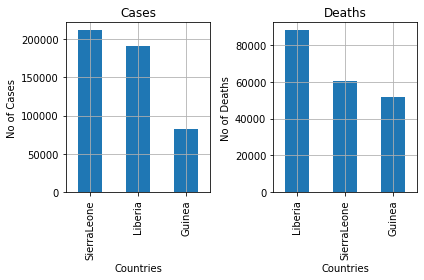

In [147]:
plt.subplot(1,2,1)
case_largest.plot(kind = 'bar', grid = True)
plt.title('Cases')
plt.xlabel('Countries')
plt.ylabel('No of Cases')
plt.subplot(1,2,2)
death_largest.plot(kind = 'bar', grid = True)
plt.title('Deaths')
plt.xlabel('Countries')
plt.ylabel('No of Deaths')
plt.tight_layout()
plt.show()

## SierraLeone has the most number of cases but second most in terms of death. Guinea is the third most affected area.And though Liberia has the second most number of cases, more people died in Liberia than anywhere else.


In [148]:
case_smallest=df.groupby('Country')['Cases'].sum().nsmallest(4)

In [149]:
death_smallest=df.groupby('Country')['Deaths'].sum().nsmallest(4)

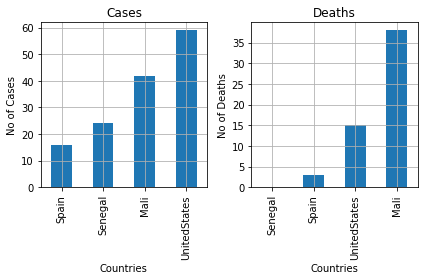

In [150]:
plt.subplot(1,2,1)
case_smallest.plot(kind = 'bar', grid = True)
plt.title('Cases')
plt.xlabel('Countries')
plt.ylabel('No of Cases')
plt.subplot(1,2,2)
death_smallest.plot(kind = 'bar', grid = True)
plt.title('Deaths')
plt.xlabel('Countries')
plt.ylabel('No of Deaths')
plt.tight_layout()
plt.show()

## Senegal has reported zero deaths due to Ebola. USA has more cases than Mali but less American died of Ebola than people from Mali.

## Fatality and Survival Rate

In [151]:
survival_rate =  (df.copy().groupby('Country').sum()['Cases'] -df.copy().groupby('Country').sum()['Deaths']) / df.copy().groupby('Country').sum()['Cases']

In [152]:
survival_rate=survival_rate*100


In [153]:
fatality_rate =  df.copy().groupby('Country').sum()['Deaths'] / df.copy().groupby('Country').sum()['Cases']

In [154]:
fatality_rate=fatality_rate*100


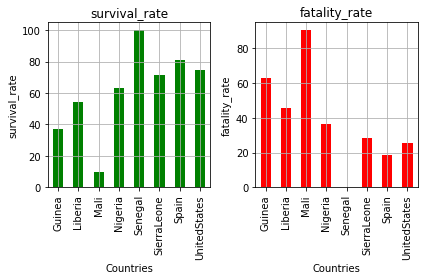

In [155]:
plt.subplot(1,2,1)
survival_rate.plot(kind = 'bar', grid = True, color='g')
plt.title('survival_rate')
plt.xlabel('Countries')
plt.ylabel('survival_rate')
plt.subplot(1,2,2)
fatality_rate.plot(kind = 'bar', grid = True, color='r')
plt.title('fatality_rate')
plt.xlabel('Countries')
plt.ylabel('fatality_rate')
plt.tight_layout()
plt.show()

### Fatality rate is highest in Mali(more than 90%) which is almost double than the worst effected area (in terms of total number of deaths) Liberia

## Closer look at Liberia

In [156]:
s=df["Country"]=="Liberia"
Li=df.loc[s]

In [157]:
Li

,Date,Day,Country,Deaths,Cases
124,2015-01-03,287,Liberia,3496.0,8166.0
125,2015-01-02,286,Liberia,3496.0,8157.0
126,2014-12-31,284,Liberia,3471.0,8115.0
127,2014-12-28,281,Liberia,3423.0,8018.0
129,2014-12-24,277,Liberia,3413.0,7977.0
...,...,...,...,...,...
235,2014-04-01,10,Liberia,5.0,8.0
236,2014-03-31,9,Liberia,4.0,8.0
237,2014-03-29,7,Liberia,2.0,7.0
238,2014-03-28,6,Liberia,3.0,3.0


Text(0, 0.5, 'Logarithmic case rate')

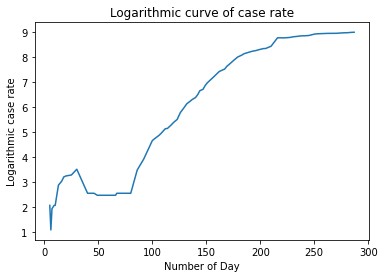

In [158]:
plt.plot(Li["Day"], np.log(Li["Cases"]))
plt.title('Logarithmic curve of case rate')
plt.xlabel('Number of Day')
plt.ylabel('Logarithmic case rate')

Text(0, 0.5, 'Logarithmic death rate')

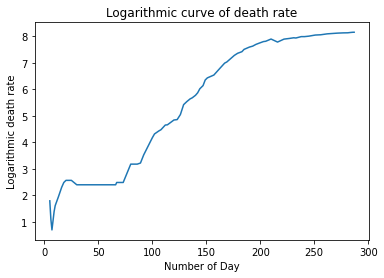

In [159]:
plt.plot(Li["Day"], np.log(Li["Deaths"]))
plt.title('Logarithmic curve of death rate')
plt.xlabel('Number of Day')
plt.ylabel('Logarithmic death rate')

## For the first 100 days after the ebola outbreak, the situation was not so bad in Liberia but after that the number of cases and number of deaths skyrocketed. 